In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv(r"E:\Downloads\quikr_car.csv")

In [3]:
df.shape

(892, 6)

In [4]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [6]:
df['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

## Mistakes
1) year has non year values
2) year object to int
3) price object to int
4) kms_driven has kms with integers
5) kms object to int
6) kms_driven has nan values
7) fuel_type has nan values
8) keep the first 3 words of name of the car

In [7]:
backup = df.copy()

In [8]:
df = df[df['year'].str.isnumeric()]

In [9]:
df['year'] = pd.to_numeric(df['year'] , errors = 'coerce').astype(int)

In [10]:
df['year']

0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
886    2009
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 842, dtype: int64

In [11]:
df = df[df['Price'] != "Ask For Price"]

In [12]:
df['Price'].str.replace(',' , '')

0       80000
1      425000
3      325000
4      575000
6      175000
        ...  
886    300000
888    260000
889    390000
890    180000
891    160000
Name: Price, Length: 819, dtype: object

In [13]:
df['Price'] = df['Price'].str.replace(',' , '').astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int64 
 3   Price       819 non-null    int64 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int64(2), object(4)
memory usage: 44.8+ KB


In [15]:
df['kms_driven'] = df['kms_driven'].str.split(' ').str.get(0).str.replace(',', '')

In [16]:
df = df[df['kms_driven'].str.isnumeric()]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int64 
 3   Price       817 non-null    int64 
 4   kms_driven  817 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int64(2), object(4)
memory usage: 44.7+ KB


In [18]:
df['kms_driven'] = df['kms_driven'].astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int64 
 3   Price       817 non-null    int64 
 4   kms_driven  817 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.7+ KB


In [20]:
df[~df['fuel_type'].isna()]

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


In [21]:
df['name'] = df['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [22]:
df= df.reset_index(drop =True)

In [23]:
df.describe()

,year,Price,kms_driven
count,817.000000,8.170000e+02,817.000000
mean,2012.440636,4.115503e+05,46250.714810
std,4.002354,4.749173e+05,34283.745254
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.900000e+05,56758.000000
max,2019.000000,8.500003e+06,400000.000000


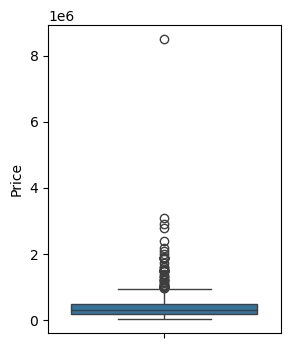

In [24]:
plt.figure(figsize=(3, 4))
sns.boxplot(y=df['Price'])
plt.show()

In [25]:
df[df['Price'] > 8e6].reset_index(drop = True)

,name,company,year,Price,kms_driven,fuel_type
0,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [26]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['Price'] >= Q1 - 1.5*IQR) & (df['Price'] <= Q3 + 1.5*IQR)]
df = df.reset_index(drop=True)


In [27]:
df.to_csv("Cleaned Data")

In [28]:
X = df.drop(columns = 'Price')
y = df['Price']

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2 , random_state = 42) 

In [30]:
ohe = OneHotEncoder()
ohe.fit(X[['name', 'company' , 'fuel_type' ]])

,categories,'auto'
,drop,None
,sparse_output,True
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [31]:
column_trans = make_column_transformer((OneHotEncoder(categories = ohe.categories , handle_unknown='ignore') ,['name', 'company' , 'fuel_type' ]), 
                                       remainder = 'passthrough' )

In [32]:
lr = LinearRegression()

In [33]:
pipe = make_pipeline(column_trans , lr)

In [34]:
pipe.fit(X_train,y_train)

,steps,"[('columntransformer', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [35]:
y_predt = pipe.predict(X_test)
y_predt

array([ 264925.27450154,  238346.50811551,  442099.81692886,
        291761.17055041,  195382.31466967,  406351.59560277,
        -33725.15294097,  319719.20682118,  558783.78367192,
        374384.03991488,   -6514.01121496,  644464.94649885,
        337930.41169769,  105787.92635074,  496497.32939728,
        392011.54008668,  284411.54347345,  232263.49510033,
        299279.72553942,  200942.00692089,  542096.48510216,
        781588.53938744,  393158.56967426,   84870.94871252,
        300111.73253709,  781588.53938744,  213139.95284974,
          2864.57974251,  217476.20282824,  611344.00192949,
        224607.28678388,  154419.06516153,  366069.44746612,
         24332.2980972 ,  141593.6632668 ,  426081.66693037,
        537588.00196614,  559778.46146822,  178629.76098379,
        343401.66163225,  481803.37140436,  420968.76327856,
        267799.32510654,   22063.31683859,  592637.50396304,
        353189.24883788,  376279.86312988,  168418.83495504,
        558459.64349212,

In [36]:
r2_score(y_test,y_predt)

0.7445543519313629